### Remembering Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Generate some random data
np.random.seed(0)
N = int(1e2)
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N, 1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
# Predictions and error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(lin_reg.intercept_, lin_reg.coef_)

In [ ]:
# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title(f'Linear Regression (MSE = {mse:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Linear Classifier

In [ ]:
# Generating binary class labels based on a threshold
y_class = (y > 7).astype(int)  # Class 1 if y > 7, otherwise Class 0

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:
# Fitting the linear regression model again (it will be used as a linear classifier)
lin_reg.fit(X_train, y_train)

# Predictions for classification (using threshold 0.5)
y_pred = (lin_reg.predict(X_test) > 0.5).astype(int)

# Accuracy calculation
accuracy = np.mean(y_pred == y_test)

# Plotting the decision boundary
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='+')
plt.title(f'Linear Classifier (Accuracy = {accuracy:.2f})')
plt.xlabel('X')
plt.ylabel('Class')
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Fitting a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Plotting the decision boundary with logistic regression
X_range = np.linspace(min(X_test), max(X_test), 300).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_range)[:, 1]

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_proba, color='red', label='Predicted Probability')
plt.title(f'Logistic Regression (Accuracy = {accuracy:.2f})')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Architectures

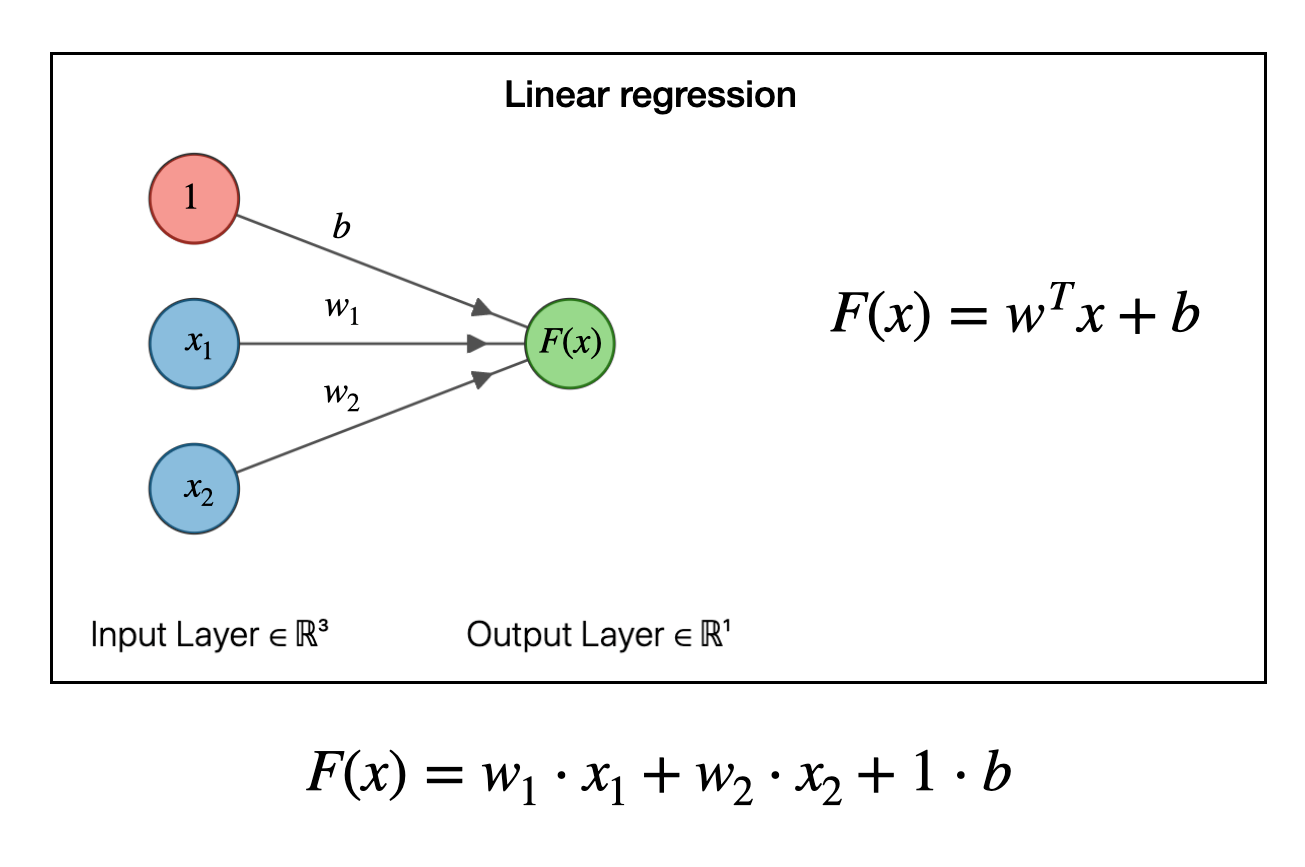

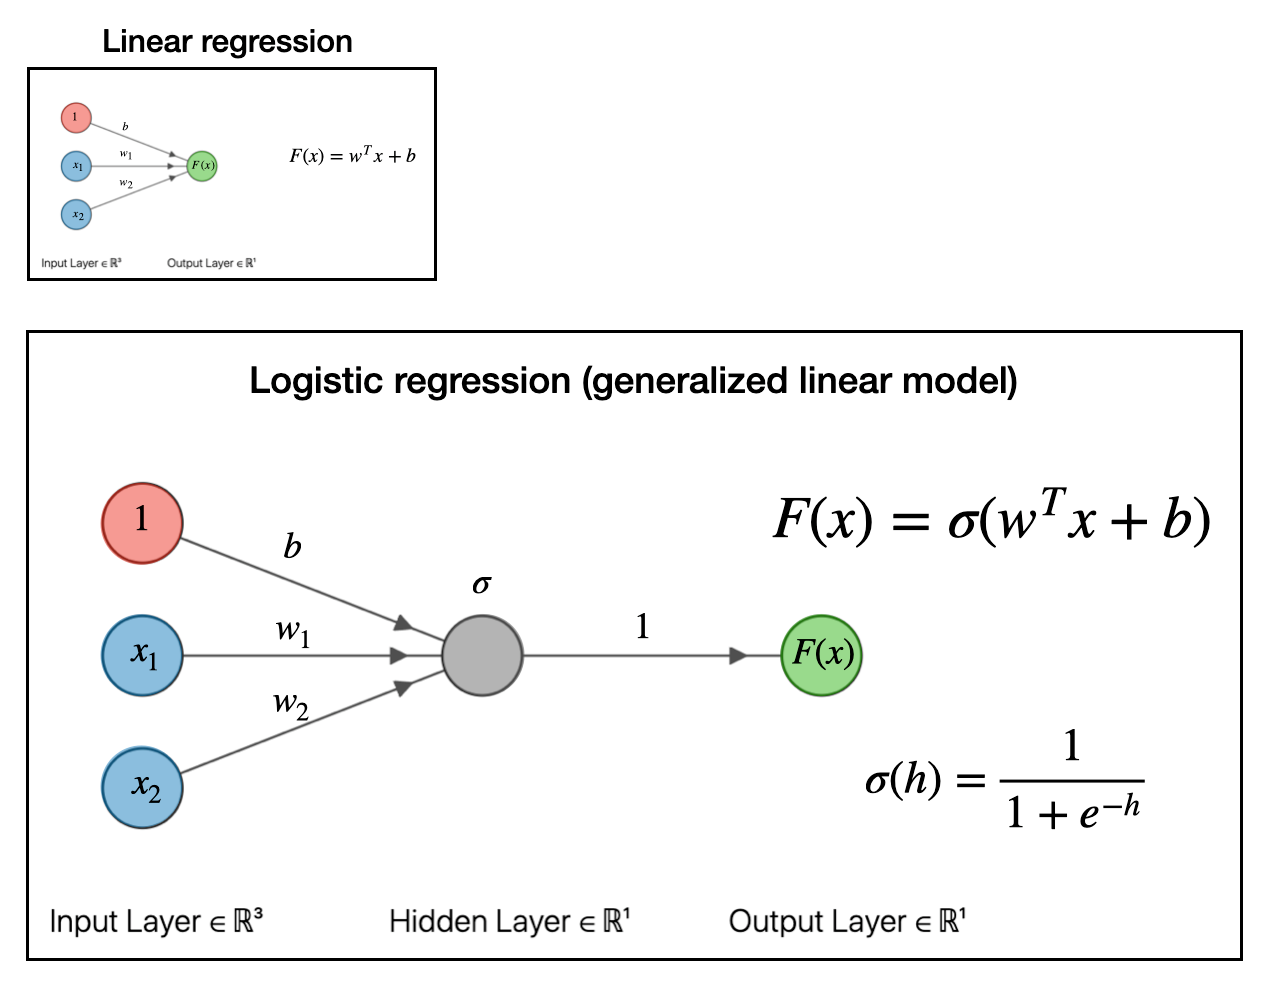

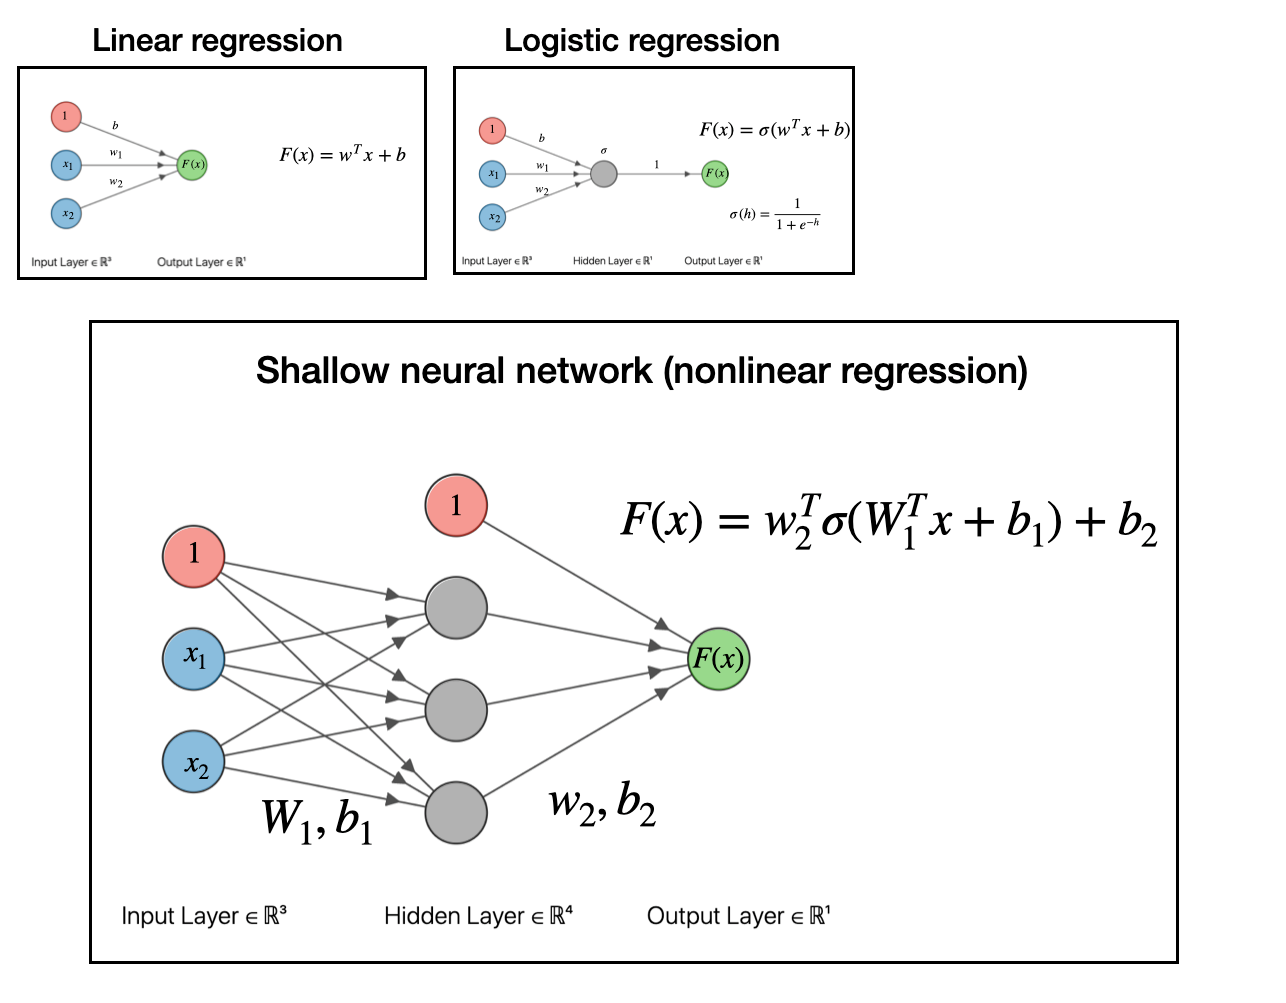

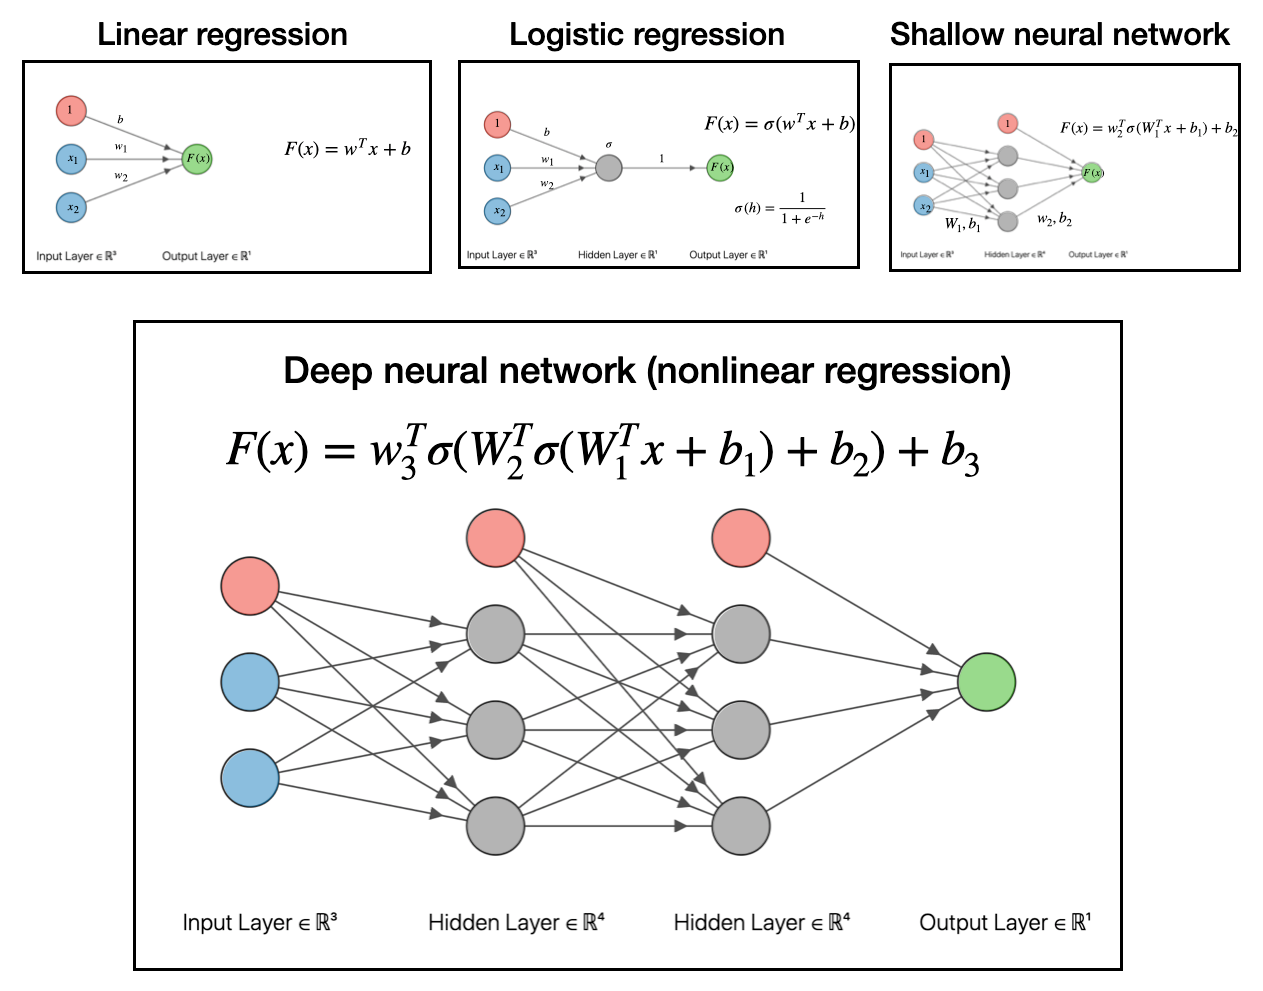

## Neurons

In [ ]:
# Basic Neuron Implementation
class SimpleNeuron:
    def __init__(self):
        self.weights = np.random.randn()
        self.bias = np.random.randn()
    
    def activation(self, x):
        """Simple step activation function"""
        return 1 if x > 0 else 0
    
    def forward(self, x):
        """Forward pass through the neuron"""
        return self.activation(self.weights * x + self.bias)

In [ ]:
neuron = SimpleNeuron()
print("Single neuron output:", neuron.forward(1.0))

In [ ]:
def plot_activation_functions():
    """Visualize common activation functions"""
    x = np.linspace(-5, 5, 100)
    
    # ReLU
    relu = np.maximum(0, x)
    
    # Sigmoid
    sigmoid = 1 / (1 + np.exp(-x))
    
    # Tanh
    tanh = np.tanh(x)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.plot(x, relu)
    plt.title('ReLU')
    plt.grid(True)
    
    plt.subplot(132)
    plt.plot(x, sigmoid)
    plt.title('Sigmoid')
    plt.grid(True)
    
    plt.subplot(133)
    plt.plot(x, tanh)
    plt.title('Tanh')
    plt.grid(True)
    
    plt.tight_layout()

# Visualize activation functions
plot_activation_functions()

In [ ]:
# Basic Neural Network Implementation
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def forward(self, x):
        """Forward pass through the network"""
        # First layer
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        
        return self.a2

# Example usage
simple_nn = SimpleNeuralNetwork(2, 3, 1)
sample_input = np.array([1.0, 2.0])
print("Simple NN output:", simple_nn.forward(sample_input))

### Tensorflow
But planning these architectures barehand is a hard work. Luckily, there is a dedicated library to do this, called `tensorflow`. Let us see the following example to classify written numbers:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[10], cmap='gray')

In [ ]:
X_train.shape

In [ ]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the images from 28x28 to 784
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

In [ ]:
X_train_flat.shape

In [ ]:
# Build the neural network model
mnist_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
mnist_model.fit(X_train_flat, y_train, epochs=5, batch_size=32)

In [ ]:
# Evaluate the model
test_loss, test_acc = mnist_model.evaluate(X_test_flat, y_test)

print(f'Test accuracy: {test_acc}')

In [ ]:
# Visualizing a sample image
test = 8243
plt.imshow(X_test[test], cmap='gray')
plt.title(f'Predicted Label: {np.argmax(mnist_model.predict(X_test[test].reshape(-1, 28*28)))}')
plt.show()
mnist_model.predict(X_test[test].reshape(-1, 28*28))
y_test[test]

In [ ]:
y_test[test]

### Breast Cancer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
data

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
cancer = models.Sequential([
    layers.Dense(15, activation="relu", input_shape=(30,)),
    layers.Dense(30, activation="relu"),
    layers.Dense(2, activation="sigmoid")
    
])

In [ ]:
# Compile the model
cancer.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
y_train.shape

In [ ]:
# Train the model
cancer.fit(X_train_scaled, y_train, epochs=20, batch_size=5)

In [ ]:
cancer.evaluate(X_test_scaled, y_test)

In [ ]:
import numpy as np

In [ ]:
y = cancer.predict(X_test_scaled)
y_bin = np.argmax(y, axis = 1) 

In [ ]:
## Let us analyze the false negative
y[(y_bin != y_test) & (y_bin == 1)]

In [ ]:
vec = np.zeros(y.shape[0])
vec[(y_bin != y_test) & (y_bin == 1)] = 0.5
vec[(y_bin != y_test) & (y_bin == 1)]

In [ ]:
mat = np.vstack((vec, np.zeros(y.shape[0]))).T
mat[(y_bin != y_test) & (y_bin == 1)]

In [ ]:
(y + mat)[(y_bin != y_test) & (y_bin == 1)]

In [ ]:
y

In [ ]:
y

In [ ]:
y_test

In [ ]:
true_pos = np.sum((y_bin == y_test) & (y_bin == 0))
true_neg = np.sum((y_bin == y_test) & (y_bin == 1))
false_pos = np.sum((y_bin != y_test) & (y_bin == 0))
false_neg = np.sum((y_bin != y_test) & (y_bin == 1))
print(true_pos, false_neg)
print(false_pos, true_neg)

### Convolution

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
img=mpimg.imread('cat.jpeg') #Read the image
img.shape

(174, 290, 3)

In [3]:
print(img.shape)

(174, 290, 3)


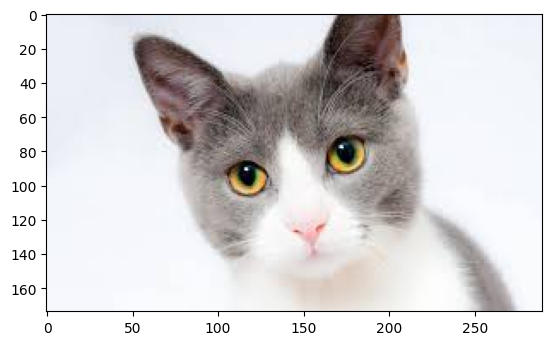

In [4]:
plt.imshow(img)
plt.grid(False)

[[236 236 236 ... 239 238 238]
 [236 236 236 ... 239 238 238]
 [236 236 236 ... 239 238 238]
 ...
 [247 247 247 ... 251 250 250]
 [247 247 247 ... 251 250 250]
 [247 247 247 ... 251 250 250]]
(174, 290)


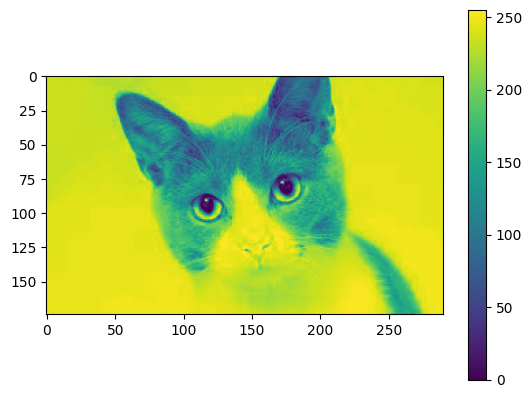

In [5]:
lum_img = img[:,:,0] # Red
print(lum_img)
print(lum_img.shape)
plt.imshow(lum_img)
plt.colorbar()

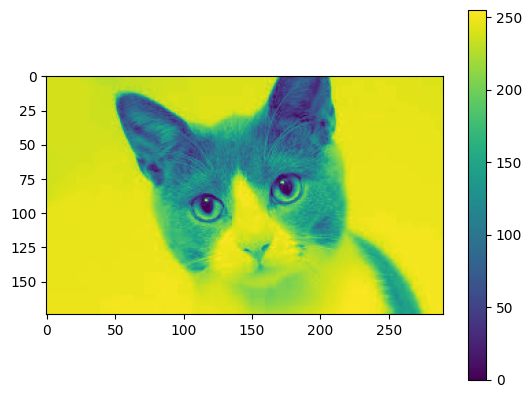

In [6]:
lum_img = img[:,:,1] # Green
plt.imshow(lum_img)
plt.colorbar()

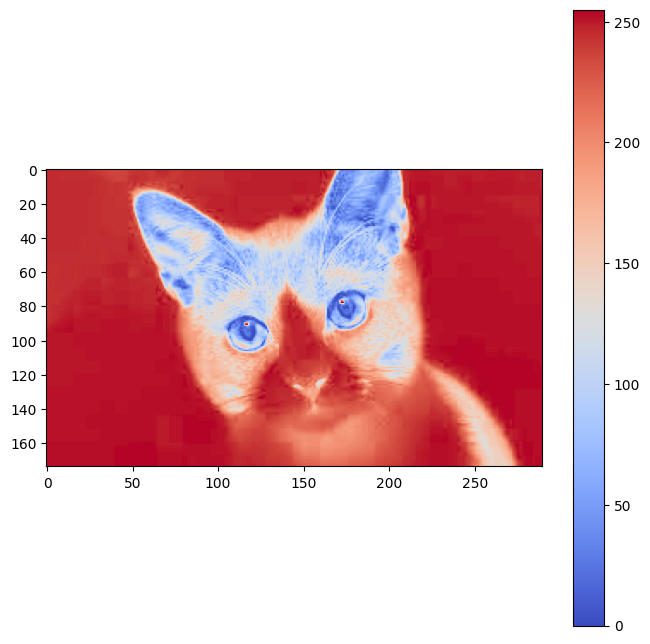

In [7]:
lum_img = img[:,:,2]
f=plt.figure(figsize=(8,8))
result=plt.imshow(lum_img)
result.set_cmap('coolwarm')
plt.grid(False)
plt.colorbar()
# Veritasium Led Azul

### Introduction to convolution

In [8]:
import numpy as np

In [9]:
a = np.array([1/6]*6) # Roll a dice
a

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [10]:
np.convolve(a,a).shape

(11,)

In [11]:
b = np.array([1/3]*3)
b

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
np.convolve(a,b)

array([0.05555556, 0.11111111, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.11111111, 0.05555556])

$$(a * v)_n = \sum_{m = -\infty}^{\infty} a_m v_{n - m}
$$

### Image Convolution

In [13]:
#Define some example kernels
kernels = {
    "Identity": np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]]),
    "Edge Detection": np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1,  0],
                         [-1, 5, -1],
                         [0, -1,  0]]),
    "Box Blur": np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]]),
    "Gaussian Blur": np.array([[1/16, 2/16, 1/16],
                               [2/16, 4/16, 2/16],
                               [1/16, 2/16, 1/16]])
}

In [14]:
from scipy.signal import convolve2d # Method for doing convolutions

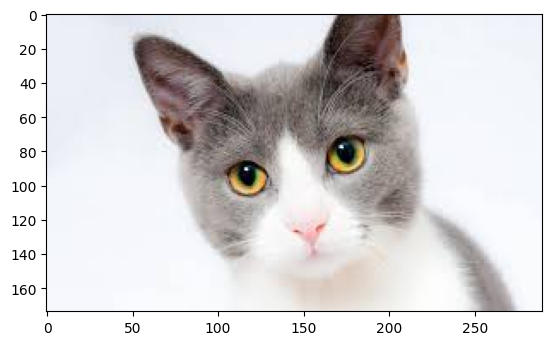

In [15]:
img=mpimg.imread('cat.jpeg') #Read the image
plt.imshow(img)

In [16]:
cat = np.mean(img, axis=2)
cat.shape

(174, 290)

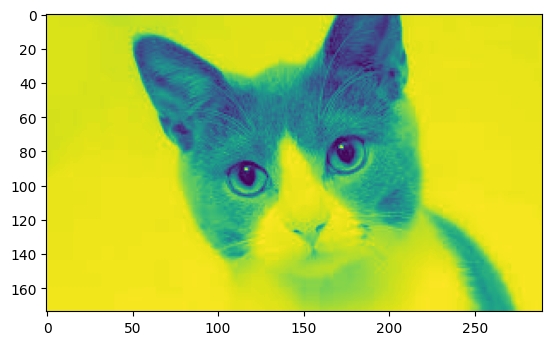

In [17]:
convolved = convolve2d(cat, kernels["Identity"], 
                       mode='same', boundary='symm') # An error
plt.imshow(convolved)

In [18]:
def apply_and_display_convolution(image, kernel_name):
    kernel = kernels[kernel_name]
    
    # Apply convolution
    convolved = convolve2d(image, kernel, mode='same', boundary='symm')
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(convolved, cmap='gray')
    ax2.set_title(f'After {kernel_name} Convolution')
    ax2.axis('off')
    
    plt.show()
    
    # Display the kernel
    print(f"{kernel_name} Kernel:")
    print(kernel)

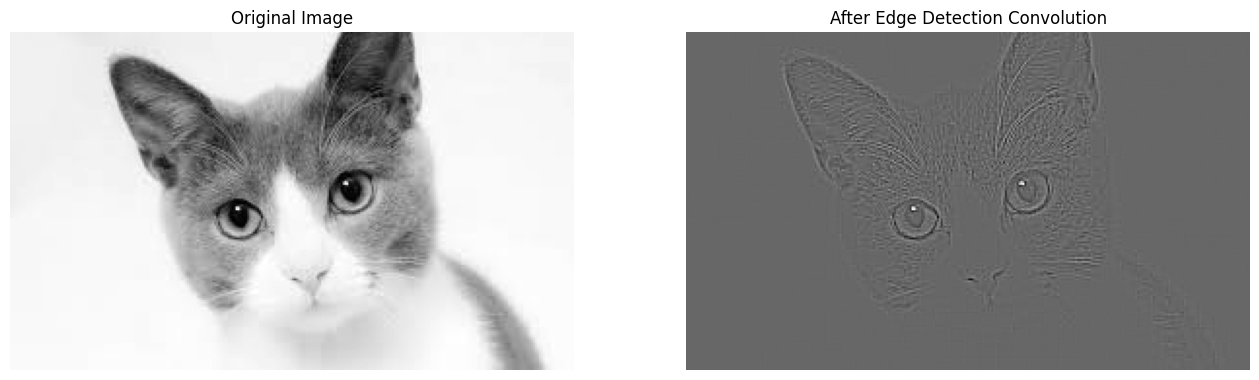

Edge Detection Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [19]:
apply_and_display_convolution(cat, "Edge Detection")

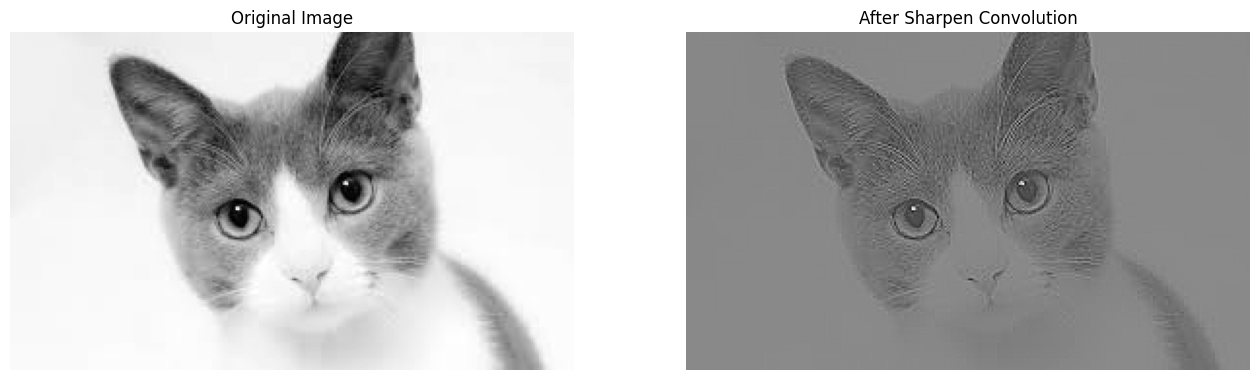

Sharpen Kernel:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [20]:
apply_and_display_convolution(cat, "Sharpen")

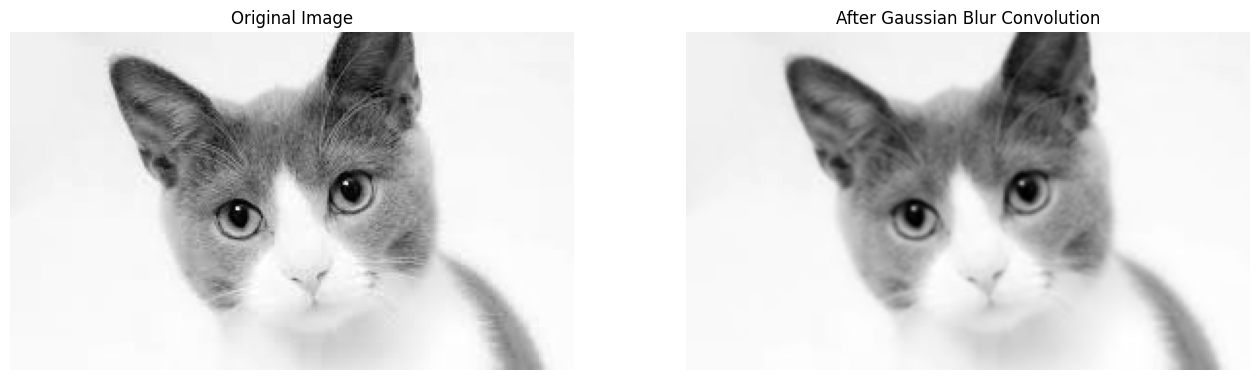

Gaussian Blur Kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [21]:
apply_and_display_convolution(cat, "Gaussian Blur")

### Image Classification with CNN (convolutional neural networks)
https://www.youtube.com/watch?v=KuXjwB4LzSA&t=811s&pp=ygUQM2IxYiBjb252b2x1dGlvbg%3D%3D

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2024-11-05 18:57:38.169984: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 18:57:38.178550: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 18:57:38.258126: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 18:57:38.322197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 18:57:38.378358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Load the CIFAR-10 dataset:

In [23]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [24]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Preprocess the data: Normalize the pixel values to the range of 0 to 1 (from 0 to 255) for faster and better model training.

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Visualize the data:

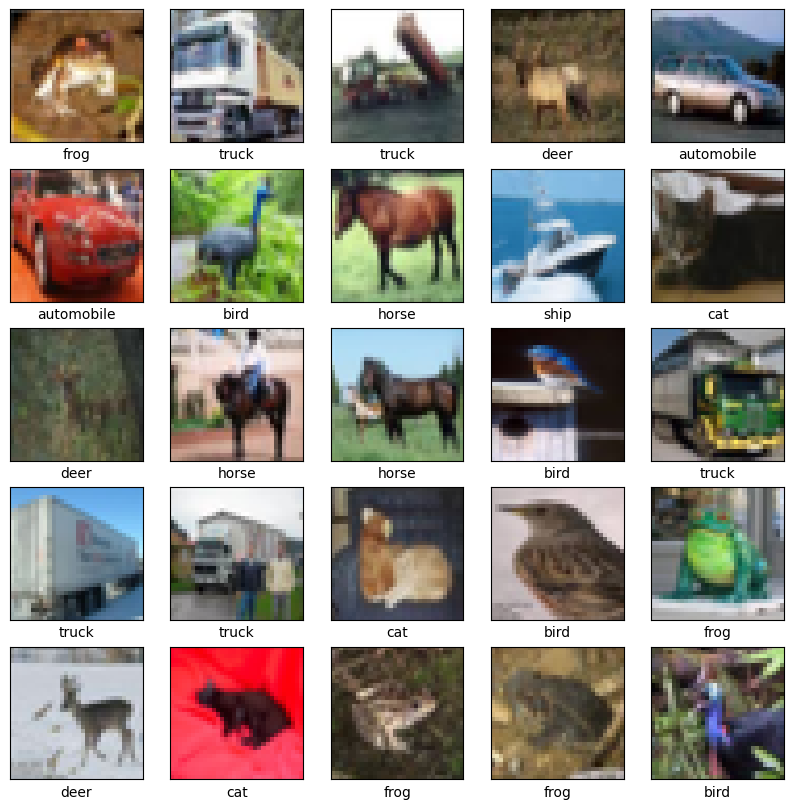

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

- Define a CNN with at least 2 convolutional layers followed by max pooling, and a couple of dense layers at the end. For that, the layers are defined in `models.Sequetial` as
```python
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
layers.MaxPooling2D((2, 2))
```
- Compile the model.
- Train the model.
- Evaluate the model performance.

In [77]:
images = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

/home/julian/Documents/Konrad Lorenz/ModeladoYSimulacion/tensorEnv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
# Compile the model
images.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [88]:
images.fit(train_images, train_labels, epochs=15, batch_size=50)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.7550 - loss: 0.7044
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.7698 - loss: 0.6616
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.7873 - loss: 0.6088
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.7975 - loss: 0.5689
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8101 - loss: 0.5424
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8276 - loss: 0.4905
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8330 - loss: 0.4673
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8450 - loss: 0.4339
Epoch 9/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.8532 - loss: 0.4051
Epoch 10/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8640 - loss: 0.3846
Epoch 11/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.8685 - loss: 0.3659
Epoch 12

In [89]:
images.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7484 - loss: 0.9191


[0.9308421015739441, 0.7487000226974487]

In [99]:
image = train_images[3]  # Get first image and normalize it

# Create a model that outputs the first conv layer
image_batch = image[None, ...]  # Same as image.reshape(1, 32, 32, 3)

# Create intermediate model more explicitly
conv_layer = images.layers[0]  # Get first conv layer
activations = conv_layer(image_batch)  # Get its output
activations.shape

TensorShape([1, 32, 32, 32])

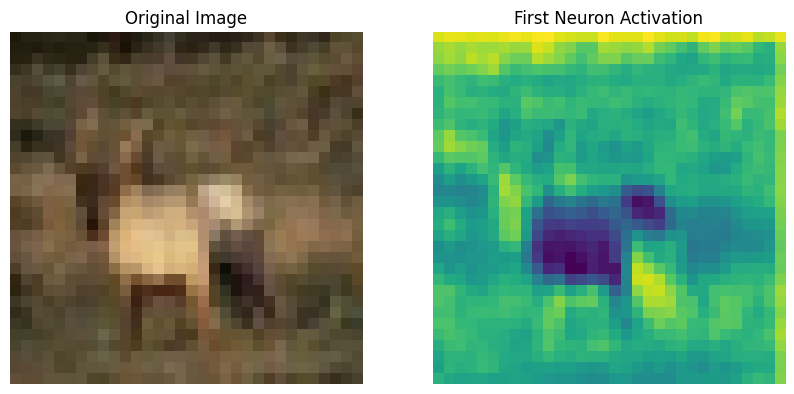

In [100]:
# Plot original image and the activation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Activation map of first filter
plt.subplot(1, 2, 2)
plt.imshow(activations[0, :, :, 8], cmap='viridis')
plt.title('First Neuron Activation')
plt.axis('off')

plt.show()

In [64]:
np.argmax(images.predict(test_images[test][None,...]))

NameError: name 'test' is not defined

In [65]:
vec = (np.argmax(images.predict(test_images), axis=1) == 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
vec.shape

In [ ]:
bol = test_labels==1
bol = bol.reshape(10000,)

In [ ]:
res = vec & bol

In [ ]:
np.where(res)

In [ ]:
a = np.array([1,2,1,-1,3,2,4])
np.where(a>2)

In [ ]:
test_images[res][0].shape

In [ ]:
test = 9687
plt.imshow(test_images[test])
plt.title("Predicted Label: "+class_names[np.argmax(images.predict(test_images[test][None,...]))])
print(class_names[test_labels[test][0]])

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [90]:
y_pred = images.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [91]:
y_pred_classes

array([5, 8, 8, ..., 5, 1, 7])

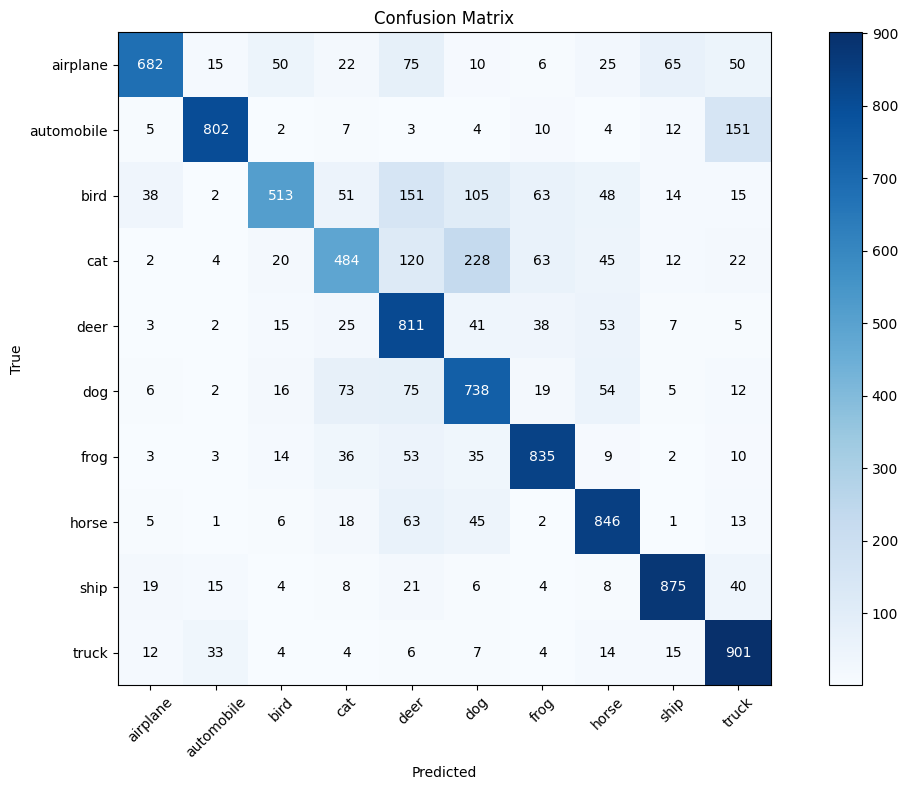


Per-class accuracy:
airplane: 68.20%
automobile: 80.20%
bird: 51.30%
cat: 48.40%
deer: 81.10%
dog: 73.80%
frog: 83.50%
horse: 84.60%
ship: 87.50%
truck: 90.10%


In [92]:
cm = confusion_matrix(test_labels, y_pred_classes)
# Create figure and plot
plt.figure(figsize=(12, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Print per-class accuracy
print("\nPer-class accuracy:")
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for class_name, accuracy in zip(class_names, per_class_accuracy):
    print(f"{class_name}: {accuracy:.2%}")

In [ ]:
Per-class accuracy:
airplane: 65.10%
automobile: 70.00%
bird: 30.90%
cat: 47.10%
deer: 48.20%
dog: 56.70%
frog: 49.50%
horse: 80.30%
ship: 70.90%
truck: 78.60%

Per-class accuracy:
airplane: 67.60%
automobile: 74.40%
bird: 43.00%
cat: 53.70%
deer: 21.10%
dog: 36.30%
frog: 84.60%
horse: 47.10%
ship: 75.20%
truck: 51.60%



Per-class accuracy:
airplane: 56.10%
automobile: 62.70%
bird: 54.30%
cat: 43.30%
deer: 41.30%
dog: 63.20%
frog: 87.00%
horse: 73.30%
ship: 60.40%
truck: 72.30%

In [ ]:
train_images.shape